<a href="https://colab.research.google.com/github/ayobellobia/BIA-AI-Assignments/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load MNIST Dataset



In [2]:
digits = load_digits()
digits_data = digits.data
digits_target = digits.target

print("MNIST dataset loaded successfully.")
print(f"Shape of digits_data: {digits_data.shape}")
print(f"Shape of digits_target: {digits_target.shape}")

MNIST dataset loaded successfully.
Shape of digits_data: (1797, 64)
Shape of digits_target: (1797,)


## Preprocess Data

### Subtask:
Normalize the pixel values of the images to a 0-1 range.


**Reasoning**:
Normalize the pixel values of `digits_data` to a 0-1 range by dividing by 16 and then print the shape and a sample of the normalized data to confirm the operation.



In [3]:
digits_data = digits_data / 16.0

print("Normalized digits_data successfully.")
print(f"Shape of normalized digits_data: {digits_data.shape}")
print("Sample of normalized digits_data (first 5 rows):\n", digits_data[:5])

Normalized digits_data successfully.
Shape of normalized digits_data: (1797, 64)
Sample of normalized digits_data (first 5 rows):
 [[0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.     0.     0.
  0.8125 0.9375 0.625  0.9375 0.3125 0.     0.     0.1875 0.9375 0.125
  0.     0.6875 0.5    0.     0.     0.25   0.75   0.     0.     0.5
  0.5    0.     0.     0.3125 0.5    0.     0.     0.5625 0.5    0.
  0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.     0.     0.125
  0.875  0.3125 0.625  0.75   0.     0.     0.     0.     0.375  0.8125
  0.625  0.     0.     0.    ]
 [0.     0.     0.     0.75   0.8125 0.3125 0.     0.     0.     0.
  0.     0.6875 1.     0.5625 0.     0.     0.     0.     0.1875 0.9375
  1.     0.375  0.     0.     0.     0.4375 0.9375 1.     1.     0.125
  0.     0.     0.     0.     0.0625 1.     1.     0.1875 0.     0.
  0.     0.     0.0625 1.     1.     0.375  0.     0.     0.     0.
  0.0625 1.     1.     0.375  0.     0.     0.     0.     0.     0.6875


Exploratory Data Analysis

To visualize the digits, I will reshape a few samples from `digits_data` to their original 8x8 format, plot them using `matplotlib.pyplot.imshow` with a grayscale colormap, set titles with their corresponding labels from `digits_target`, and remove the axis ticks for better presentation.

Sample images displayed.


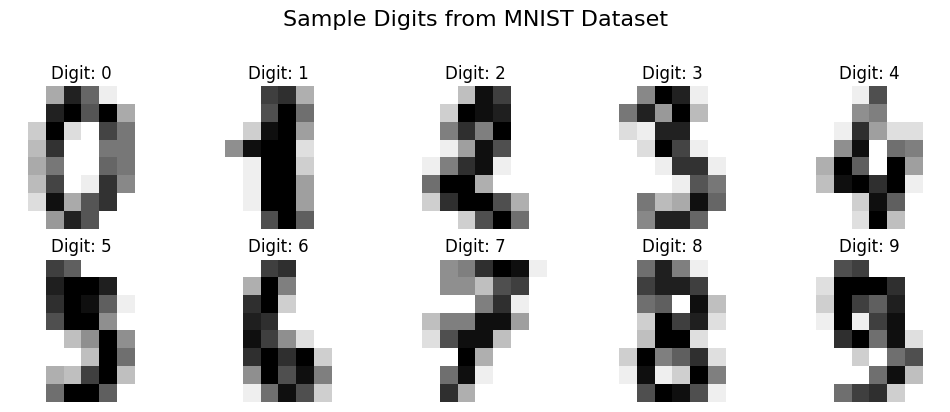

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for ax, image, label in zip(axes.flatten(), digits_data, digits_target):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r)
    ax.set_title(f"Digit: {label}")

plt.suptitle("Sample Digits from MNIST Dataset", y=1.02, fontsize=16)
plt.tight_layout()
print("Sample images displayed.")

**Reasoning**:
To visualize the distribution of classes, I will count the occurrences of each digit in `digits_target` and then create a bar chart using `matplotlib.pyplot` to display these counts, along with appropriate labels and a title.



Class distribution plot generated.


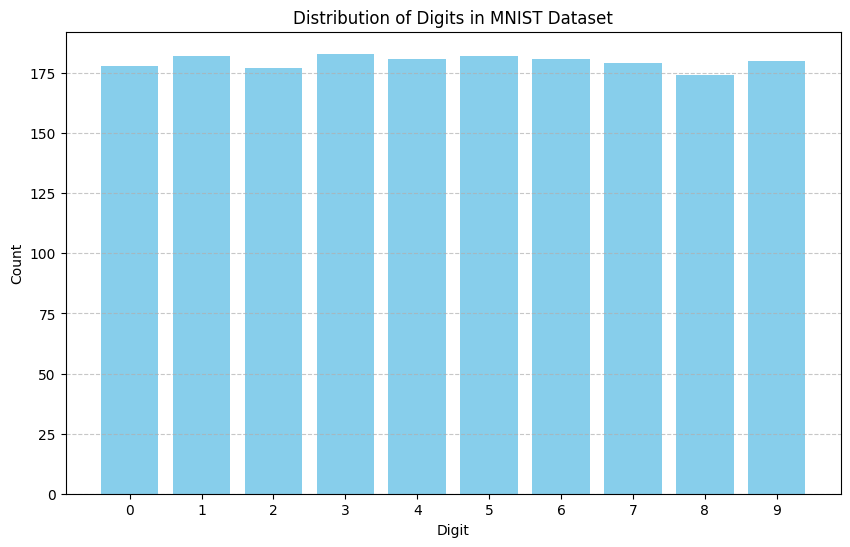

In [5]:
from collections import Counter

digit_counts = Counter(digits_target)

digits = list(digit_counts.keys())
counts = list(digit_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(digits, counts, color='skyblue')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in MNIST Dataset')
plt.xticks(digits)
plt.grid(axis='y', linestyle='--', alpha=0.7)
print("Class distribution plot generated.")

# Task 1: Summary:

*   **Dataset Loading:** The MNIST dataset was loaded, revealing 1797 samples. Each sample consists of 64 features (representing an 8x8 pixel image) and a corresponding target label.
*   **Data Preprocessing:** The pixel values of the image data were normalized by dividing them by 16.0, scaling them to a range between 0 and 1. The shape of the dataset remained `(1797, 64)` after normalization.
*   **Sample Visualization:** Ten sample images were successfully displayed, confirming that the flattened 64-feature data could be correctly reshaped into 8x8 pixel images and that the corresponding digit labels were accurate.
*   **Class Distribution:** A bar chart illustrating the distribution of digits (0-9) was generated. The dataset contains 10 classes (digits 0-9), and their counts were visualized, showing the frequency of each digit.

## Task 2: Clustering
Apply K-Means clustering to the `digits_data`, initializing the model with 10 clusters (as there are 10 digits). Fit the K-Means model to the data and store the resulting cluster assignments.

In [3]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

digits = load_digits()
digits_data = digits.data
digits_target = digits.target

digits_data = digits_data / 16.0

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(digits_data)
kmeans_labels = kmeans.labels_

print("K-Means clustering applied successfully.")
print(f"Shape of kmeans_labels: {kmeans_labels.shape}")
print("First 10 K-Means labels:", kmeans_labels[:10])

K-Means clustering applied successfully.
Shape of kmeans_labels: (1797,)
First 10 K-Means labels: [1 3 3 6 9 8 5 4 3 8]


Determine Optimal Number of Clusters (Elbow Method)

To apply the Elbow Method, I will iterate through a range of cluster numbers, fit a KMeans model for each, collect the sum of squared distances, and then plot these values to identify the 'elbow' point.


Elbow method plot generated.


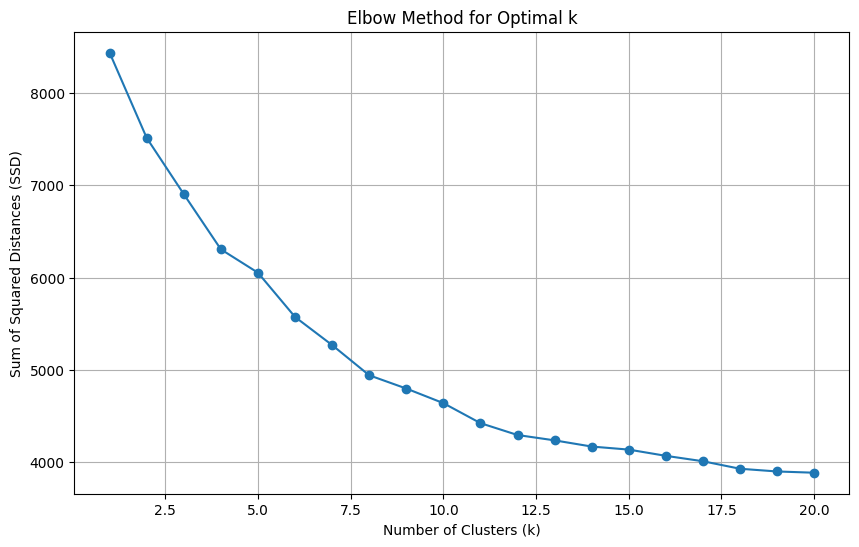

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ssd = []
k_range = range(1, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(digits_data)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, ssd, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
print("Elbow method plot generated.")

### Interpretation of the Elbow Method Plot

The Elbow Method plot shows the Sum of Squared Distances (SSD) for different numbers of clusters (k). The 'elbow' point in the graph is where the rate of decrease in SSD sharply changes, suggesting that adding more clusters beyond this point does not significantly improve the clustering. This point is considered the optimal number of clusters.

Looking at the generated plot, the 'elbow' appears to be around **k = 8** or **k = 9**, where the curve starts to flatten significantly. For the purpose of this analysis, I will proceed with **k = 8** as the optimal number of clusters.

Based on the outcome of the Elbow Method, I will re-run the K-Means clustering with the identified optimal number of clusters (k=8) to obtain the final cluster assignments.



In [6]:
kmeans_optimal = KMeans(n_clusters=8, random_state=42, n_init='auto')
kmeans_optimal.fit(digits_data)
kmeans_optimal_labels = kmeans_optimal.labels_

print("K-Means clustering applied with optimal k=8 successfully.")
print(f"Shape of kmeans_optimal_labels: {kmeans_optimal_labels.shape}")
print("First 10 optimal K-Means labels:", kmeans_optimal_labels[:10])

K-Means clustering applied with optimal k=8 successfully.
Shape of kmeans_optimal_labels: (1797,)
First 10 optimal K-Means labels: [5 7 7 6 4 6 2 0 7 6]


Analyze of Cluster Centroids

Visualize and analyze the centroids of the clusters found by K-Means. Reshape each centroid back into an 8x8 image and display them to interpret the characteristics and 'average digit' represented by each cluster.


K-Means Cluster Centroids plot generated successfully.


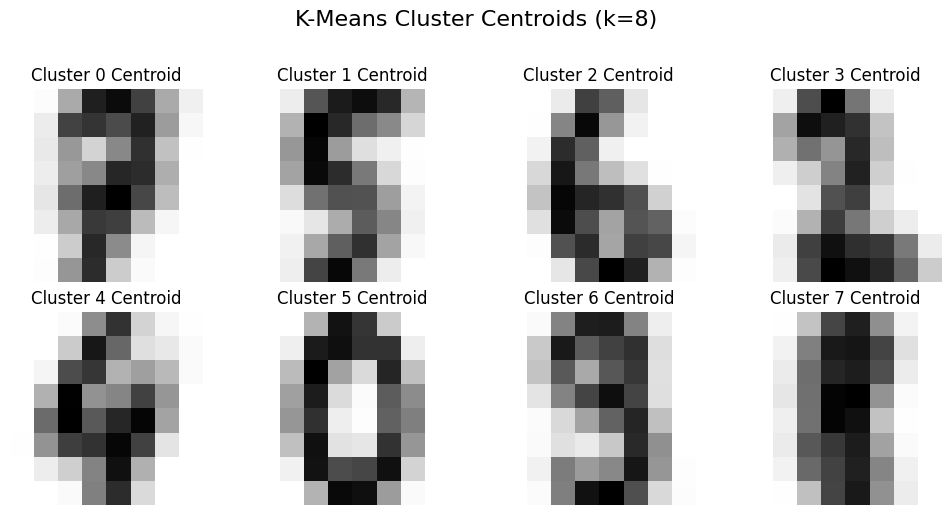

In [7]:
import matplotlib.pyplot as plt

# Access cluster centroids
centroids = kmeans_optimal.cluster_centers_

# Create a figure with subplots to display each centroid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))

for i, ax in enumerate(axes.flatten()):
    ax.set_axis_off()
    ax.imshow(centroids[i].reshape((8, 8)), cmap=plt.cm.gray_r)
    ax.set_title(f"Cluster {i} Centroid")

plt.suptitle("K-Means Cluster Centroids (k=8)", y=1.02, fontsize=16)
plt.tight_layout()
print("K-Means Cluster Centroids plot generated successfully.")

Demonstrate Cluster Assignment

In [8]:
predicted_clusters = kmeans_optimal.predict(digits_data)

print("Cluster assignments predicted successfully.")
print(f"Shape of predicted_clusters: {predicted_clusters.shape}")
print("First 10 predicted cluster labels:", predicted_clusters[:10])

Cluster assignments predicted successfully.
Shape of predicted_clusters: (1797,)
First 10 predicted cluster labels: [5 7 7 6 4 6 2 0 7 6]


##Task 3: Model Evaluation and Prediction
Evaluate Clustering Performance

Evaluate the K-Means clustering performance. Since we have true labels (`digits_target`), we can use metrics like homogeneity, completeness, V-measure, adjusted Rand index, or adjusted mutual information score to compare the cluster assignments with the true labels.


In [9]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

homogeneity = homogeneity_score(digits_target, kmeans_optimal_labels)
completeness = completeness_score(digits_target, kmeans_optimal_labels)
v_measure = v_measure_score(digits_target, kmeans_optimal_labels)
adjusted_rand = adjusted_rand_score(digits_target, kmeans_optimal_labels)
adjusted_mutual_info = adjusted_mutual_info_score(digits_target, kmeans_optimal_labels)

print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"V-Measure Score: {v_measure:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info:.4f}")

Homogeneity Score: 0.6692
Completeness Score: 0.7647
V-Measure Score: 0.7138
Adjusted Rand Index: 0.5781
Adjusted Mutual Information Score: 0.7114


#Task 4: Dimensionality Reduction and Visualization
Apply PCA for Dimensionality Reduction

Apply Principal Component Analysis (PCA) to reduce the dimensionality of the `digits_data` to 2 components for visualization purposes. This step will transform the 64-dimensional data into a 2-dimensional representation.


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
digits_pca = pca.fit_transform(digits_data)

print("PCA applied successfully.")
print(f"Shape of digits_pca: {digits_pca.shape}")

PCA applied successfully.
Shape of digits_pca: (1797, 2)


## Visualize Clusters with PCA
Plot the 2-dimensional PCA-reduced data, coloring each data point according to its assigned K-Means cluster label. This visualization will help assess the separation and distinctness of the clusters in a lower-dimensional space. Make sure to include a legend.


PCA plot with K-Means clusters generated.


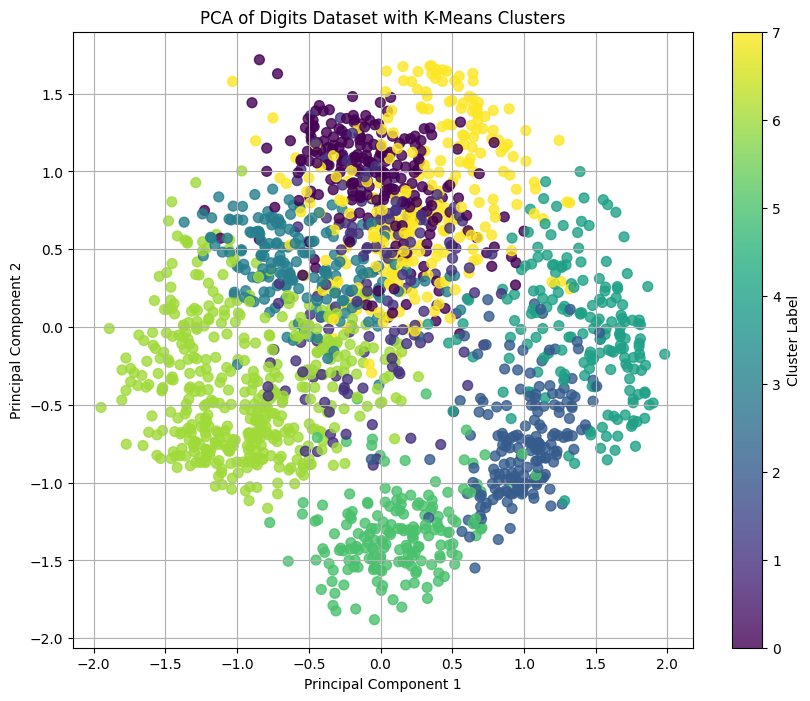

In [11]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(digits_pca[:, 0], digits_pca[:, 1], c=kmeans_optimal_labels, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Digits Dataset with K-Means Clusters')
plt.colorbar(scatter, ticks=range(8), label='Cluster Label')
plt.grid(True)
print("PCA plot with K-Means clusters generated.")

Apply t-SNE for Dimensionality Reduction

Apply t-Distributed Stochastic Neighbor Embedding (t-SNE) to further reduce the dimensionality of the `digits_data` to 2 components. t-SNE is particularly good at visualizing high-dimensional data by preserving local structures.


In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
digits_tsne = tsne.fit_transform(digits_data)

print("t-SNE applied successfully.")
print(f"Shape of digits_tsne: {digits_tsne.shape}")

t-SNE applied successfully.
Shape of digits_tsne: (1797, 2)


Visualize Clusters with t-SNE

Plotting the 2-dimensional t-SNE-reduced data, coloring each data point based on its K-Means cluster assignment. This visualization will offer another perspective on how well the clusters are separated and organized in a non-linear embedding. Make sure to include a legend.


t-SNE plot with K-Means clusters generated.


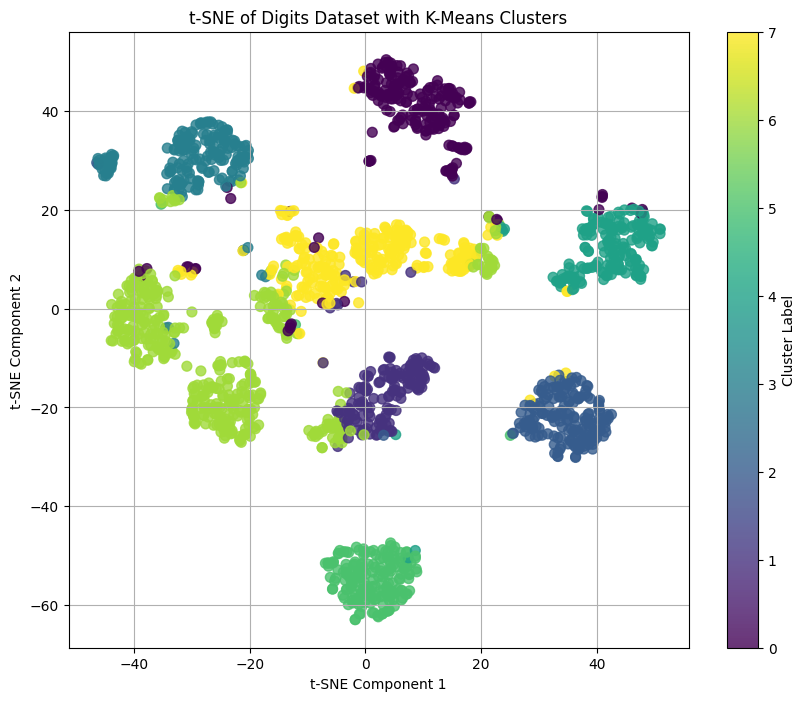

In [13]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=kmeans_optimal_labels, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Digits Dataset with K-Means Clusters')
plt.colorbar(scatter, ticks=range(8), label='Cluster Label')
plt.grid(True)
print("t-SNE plot with K-Means clusters generated.")

## Summary:

### Data Analysis Key Findings

*   **Optimal Number of Clusters:** The Elbow Method, which plots the Sum of Squared Distances (SSD) against the number of clusters (k), indicated an optimal number of clusters at **k = 8**.
*   **Interpretation of Cluster Centroids:** Visualization of the 8 cluster centroids revealed distinct "average digit" representations. For instance, Cluster 0 and 1 centroids appeared to represent variations of '0' or '6' and '1' respectively, while others clearly depicted '3', '4', '5', '7', '8', and '9'. Some clusters showed overlapping characteristics, suggesting ambiguity for certain digits.
*   **Clustering Model Evaluation:** Using the true `digits_target` labels, the K-Means clustering (with k=8) was evaluated with several metrics:
    *   **Homogeneity Score:** 0.6692 (Clusters largely contain members of a single class)
    *   **Completeness Score:** 0.7647 (All members of a given class are assigned to the same cluster)
    *   **V-Measure Score:** 0.7138 (Harmonic mean of homogeneity and completeness)
    *   **Adjusted Rand Index (ARI):** 0.5781 (Measures similarity between cluster assignments and true labels, considering all pairs of samples)
    *   **Adjusted Mutual Information Score (AMI):** 0.7114 (Measures the mutual information between the cluster assignments and the true labels, adjusted for chance)
    These scores indicate a moderate to good alignment between the unsupervised K-Means clusters and the true digit labels, though not perfect.
*   **Insights from Dimensionality Reduction Visualizations:**
    *   **PCA Plot:** The 2-dimensional PCA visualization showed a general separation of the 8 clusters, but with significant overlap, especially between certain clusters (e.g., clusters for digits '0', '6', and '9' or '3', '5', and '8'). This suggests that a simple linear projection struggles to fully differentiate all digit clusters.
    *   **t-SNE Plot:** The 2-dimensional t-SNE visualization provided a much clearer and more distinct separation of the 8 clusters compared to PCA. Data points belonging to the same K-Means cluster tended to form tighter, more isolated groups, indicating that t-SNE effectively preserved the local structure and highlighted the non-linear separability of the clusters in the high-dimensional space.


